In [2]:
import numpy as np

In [3]:
from tensorflow.keras import layers, models

In [4]:
from tensorflow.keras.datasets import imdb

In [5]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/sambaran/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sambaran/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [7]:
type(train_data)

numpy.ndarray

In [8]:
def vectorize(sequence, dimension = 10000): 
    '''
    For the imdb dataset, train data is a list of indices corresponding to words in the review
    For input to the neural network, this has to be converted to a matrix of integer indices
    Create a np matrix of shape (len(train_data), dimension) where all elements are 0 except indices present in input
    '''
    result = np.zeros((len(sequence), dimension), dtype = np.float32)
    for i, item in enumerate(sequence): 
        result[i,item] = 1
    return result

In [9]:
train_data = vectorize(train_data)

In [10]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [12]:
train_data.shape

(25000, 10000)

In [13]:
test_data = vectorize(test_data)

In [14]:
model = models.Sequential()
model.add(layers.Dense(24,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
optimizer = optimizers.Adam(learning_rate=1e-3)
loss = losses.binary_crossentropy

In [16]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                240024    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 240,649
Trainable params: 240,649
Non-trainable params: 0
_________________________________________________________________


In [19]:
indices = np.random.permutation(len(train_data))

In [20]:
indices

array([22954, 21379,   442, ...,  4497, 17592,  2116])

In [25]:
x_train = train_data[indices[:-10000]]
y_train = train_label[indices[:-10000]]

In [26]:
x_train.shape

(15000, 10000)

In [27]:
y_train.shape

(15000,)

In [28]:
x_val = train_data[-10000:]
y_val = train_label[-10000:]

In [29]:
model.fit(x_train, y_train, batch_size=512, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
30/30 [==============================] - 2s 45ms/step - loss: 0.6259 - accuracy: 0.6749 - val_loss: 0.3739 - val_accuracy: 0.8762
Epoch 2/200
30/30 [==============================] - 0s 13ms/step - loss: 0.3246 - accuracy: 0.8898 - val_loss: 0.2532 - val_accuracy: 0.9095
Epoch 3/200
30/30 [==============================] - 0s 13ms/step - loss: 0.2019 - accuracy: 0.9370 - val_loss: 0.2004 - val_accuracy: 0.9302
Epoch 4/200
30/30 [==============================] - 0s 12ms/step - loss: 0.1443 - accuracy: 0.9568 - val_loss: 0.1816 - val_accuracy: 0.9375
Epoch 5/200
30/30 [==============================] - 0s 13ms/step - loss: 0.1096 - accuracy: 0.9707 - val_loss: 0.1720 - val_accuracy: 0.9434
Epoch 6/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0807 - accuracy: 0.9820 - val_loss: 0.1695 - val_accuracy: 0.9458
Epoch 7/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0612 - accuracy: 0.9898 - val_loss: 0.1768 - val_accuracy: 0.9471
Epoch 

Epoch 113/200
30/30 [==============================] - 0s 13ms/step - loss: 2.5421e-06 - accuracy: 1.0000 - val_loss: 0.7175 - val_accuracy: 0.9448
Epoch 114/200
30/30 [==============================] - 0s 13ms/step - loss: 2.7576e-06 - accuracy: 1.0000 - val_loss: 0.7195 - val_accuracy: 0.9448
Epoch 115/200
30/30 [==============================] - 0s 14ms/step - loss: 2.3265e-06 - accuracy: 1.0000 - val_loss: 0.7215 - val_accuracy: 0.9448
Epoch 116/200
30/30 [==============================] - 1s 18ms/step - loss: 2.5740e-06 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.9448
Epoch 117/200
30/30 [==============================] - 0s 16ms/step - loss: 2.3063e-06 - accuracy: 1.0000 - val_loss: 0.7254 - val_accuracy: 0.9448
Epoch 118/200
30/30 [==============================] - 0s 13ms/step - loss: 2.2539e-06 - accuracy: 1.0000 - val_loss: 0.7274 - val_accuracy: 0.9448
Epoch 119/200
30/30 [==============================] - 0s 14ms/step - loss: 2.2973e-06 - accuracy: 1.0000 - val_

In [30]:
history = _

In [31]:
type(history)

tensorflow.python.keras.callbacks.History

In [34]:
history = history.history

In [35]:
type(history)

dict

In [36]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training loss vs validation loss')

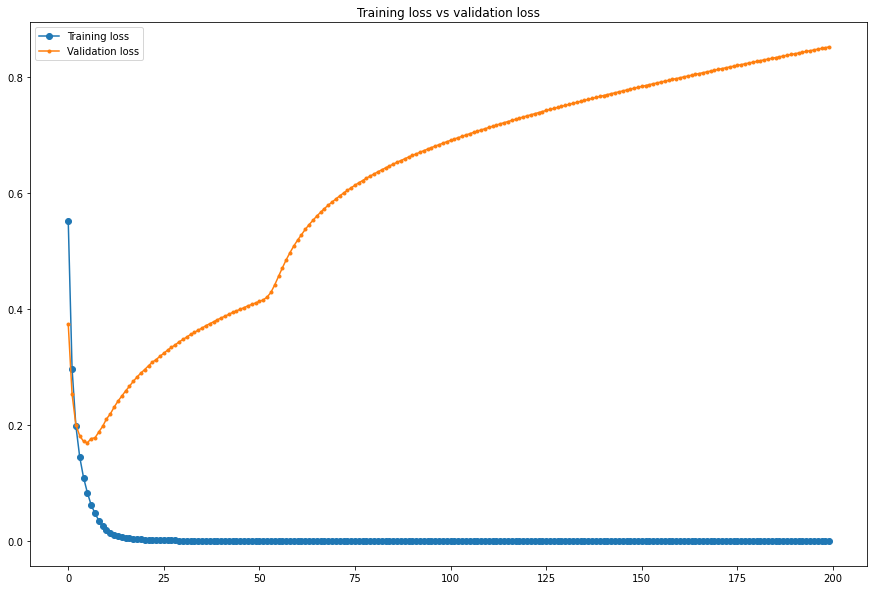

In [44]:
from matplotlib.pylab import figure, subplots
%matplotlib inline
fig, axs = subplots(1,1,figsize = (15,10))
axs.plot(range(200), history['loss'], marker = 'o', label = 'Training loss')
axs.plot(range(200), history['val_loss'], marker = '.', label = 'Validation loss')
axs.legend()
axs.set_title('Training loss vs validation loss')



As we can see, our training loss decreased but validation loss increased which is signs of overfitting. So the network parameters are not too good. 

In [45]:
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 1s 23ms/step - loss: 0.6438 - accuracy: 0.4954 - val_loss: 0.4517 - val_accuracy: 0.9445
Epoch 2/50
30/30 [==============================] - 0s 13ms/step - loss: 0.3539 - accuracy: 1.0000 - val_loss: 0.3749 - val_accuracy: 0.9446
Epoch 3/50
30/30 [==============================] - 0s 14ms/step - loss: 0.2430 - accuracy: 1.0000 - val_loss: 0.3426 - val_accuracy: 0.9450
Epoch 4/50
30/30 [==============================] - 0s 16ms/step - loss: 0.1857 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 0.9447
Epoch 5/50
30/30 [==============================] - 0s 16ms/step - loss: 0.1385 - accuracy: 1.0000 - val_loss: 0.2893 - val_accuracy: 0.9447
Epoch 6/50
30/30 [==============================] - 1s 17ms/step - loss: 0.1021 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9448
Epoch 7/50
30/30 [==============================] - 0s 13ms/step - loss: 0.0726 - accuracy: 1.0000 - val_loss: 0.2594 - val_accuracy: 0.9445
Epoch 8/50
30

Text(0.5, 1.0, 'Training loss vs validation loss')

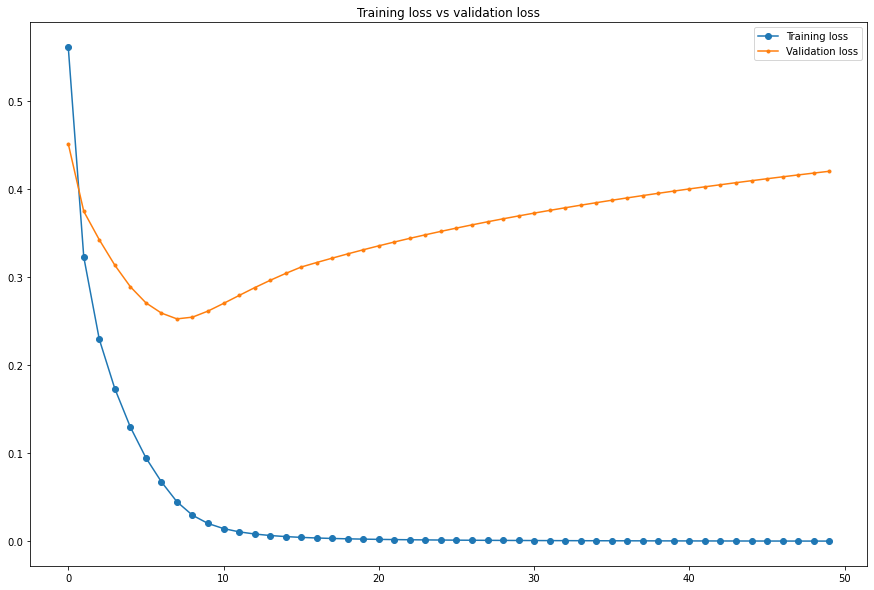

In [47]:
history = _
history = history.history
fig, axs = subplots(1,1,figsize = (15,10))
axs.plot(range(50), history['loss'], marker = 'o', label = 'Training loss')
axs.plot(range(50), history['val_loss'], marker = '.', label = 'Validation loss')
axs.legend()
axs.set_title('Training loss vs validation loss')

We can see that this time there is not that much increase in validation loss compared to previous ones. We can see validation loss is minimum around epoch number 8. So lets train for only 8 epochs

In [55]:
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=1024, epochs=8, validation_data=(x_val, y_val))

Epoch 1/8
15/15 [==============================] - 1s 46ms/step - loss: 0.6511 - accuracy: 0.6769 - val_loss: 0.5324 - val_accuracy: 0.9446
Epoch 2/8
15/15 [==============================] - 0s 24ms/step - loss: 0.4565 - accuracy: 1.0000 - val_loss: 0.3777 - val_accuracy: 0.9446
Epoch 3/8
15/15 [==============================] - 0s 25ms/step - loss: 0.2754 - accuracy: 1.0000 - val_loss: 0.3213 - val_accuracy: 0.9446
Epoch 4/8
15/15 [==============================] - 0s 26ms/step - loss: 0.1805 - accuracy: 1.0000 - val_loss: 0.3046 - val_accuracy: 0.9446
Epoch 5/8
15/15 [==============================] - 0s 26ms/step - loss: 0.1258 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9446
Epoch 6/8
15/15 [==============================] - 0s 26ms/step - loss: 0.0907 - accuracy: 1.0000 - val_loss: 0.2789 - val_accuracy: 0.9446
Epoch 7/8
15/15 [==============================] - 0s 25ms/step - loss: 0.0661 - accuracy: 1.0000 - val_loss: 0.2745 - val_accuracy: 0.9445
Epoch 8/8
15/15 [===

Text(0.5, 1.0, 'Training loss vs validation loss')

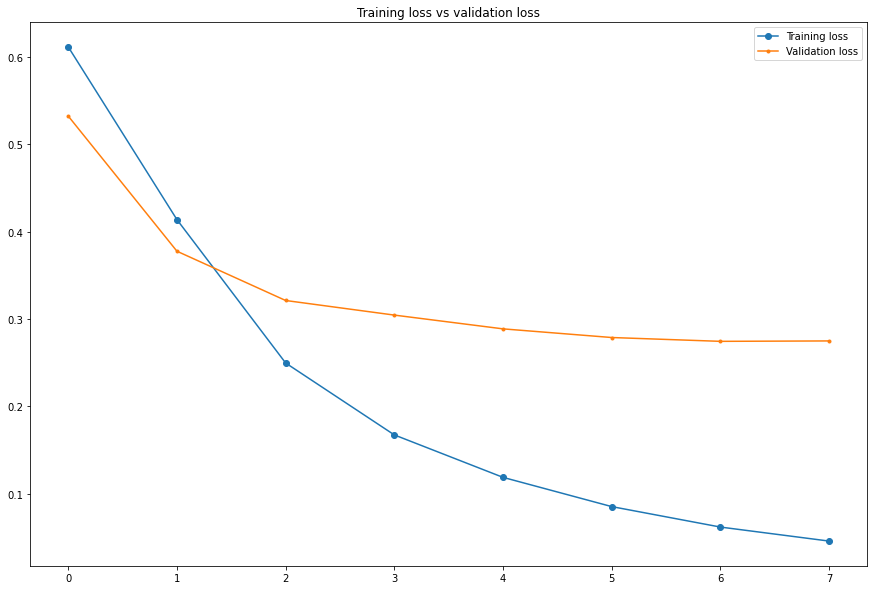

In [56]:
history = _
history = history.history
fig, axs = subplots(1,1,figsize = (15,10))
axs.plot(range(8), history['loss'], marker = 'o', label = 'Training loss')
axs.plot(range(8), history['val_loss'], marker = '.', label = 'Validation loss')
axs.legend()
axs.set_title('Training loss vs validation loss')

# Making predicitions using trained model

In [51]:
y_predict = model.predict(test_data)

In [52]:
y_predict

array([[0.05454803],
       [0.98437405],
       [0.98437405],
       ...,
       [0.05454803],
       [0.05454803],
       [0.98437405]], dtype=float32)

In [60]:
accuracy = model.evaluate(test_data, test_label)

782/782 [==============================] - 1s 1ms/step - loss: 0.6674 - accuracy: 0.8461


In [61]:
test_label

array([0, 1, 1, ..., 0, 0, 0])